# What makes people happy? Can you find Dytopia?

The `World Happiness Report` is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. Over the last year’s, `World Happiness Report` focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.

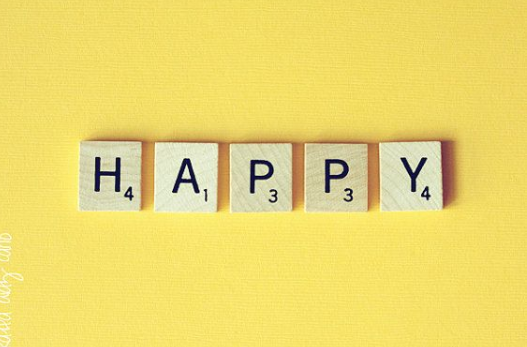


**Dataset information**

    The information in the datasets is based on answers to the most life evaluation address inquired within the survey. This address, known as the Cantril step, asks respondents to think of a step with the most excellent conceivable life for them being a 10 and the most exceedingly bad conceivable life being a and to rate their claim current lives on that scale. 


The Happiness Score is explained by the following factors:

- `Overall rank`: happiness rank of the different countries
- `Country o region`
- `Score`:  is a national average of the responses to the main life evaluation question asked in the Gallup World Poll (GWP), which uses the Cantril Ladder. Ranges from [0-10]
- `GDP per capita`
- `Healthy Life Expectancy`: score that goes from [0-1], being 1 the ones that have more confidence in terms of healthy life
- `Social support`: it indicates how people are appreciating the social support by governments, and it that ranges from [0-2]
- `Freedom to make life choices` score that ranges from 0 to 1, being 1 the ones that feel more free
- `Generosity`:score that ranges from 0 to 1, being 1 the ones that feel more generosity 
- `Perceptions of corruption`: perception of corruption on the country that it goes from  0 to 1. The higher this value is the lower perception of corruption 
- `year`  


>dataset: `Ex2.2._Happiness-Score.csv`

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import plotly.express as px 
from mpl_toolkits.mplot3d import axes3d
import matplotlib.gridspec as grd


import warnings
warnings.filterwarnings('ignore')

In [2]:

"""
Which factors are more important to live a happier life? As a result, people and countries can focus on the 
more significant factors to achieve a higher happiness level
"""


'\nWhich factors are more important to live a happier life? As a result, people and countries can focus on the \nmore significant factors to achieve a higher happiness level\n'

In [3]:
data = pd.read_csv('../datasets/Happiness-Score.csv')
data.head()

Unnamed: 0  Unnamed: 0.1  Overall rank Country or region  Score  \
0           0             0             1           Finland  7.632   
1           1             1             2            Norway  7.594   
2           2             2             3           Denmark  7.555   
3           3             3             4           Iceland  7.495   
4           4             4             5       Switzerland  7.487   

   GDP per capita  Social support  Healthy life expectancy  \
0           1.305           1.592                      NaN   
1           1.456           1.582                      NaN   
2           1.351           1.590                      NaN   
3           1.343           1.644                      NaN   
4           1.420           1.549                      NaN   

   Freedom to make life choices  Generosity  Perceptions of corruption  year  
0                         0.681       0.202                      0.393  2018  
1                         0.686       0.286                      0.340  2018  
2                         0.683       0.284                      0.408  2018  
3                         0.677       0.353                      0.138  2018  
4                         0.660       0.256                      0.357  2018

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    312 non-null    int64  
 1   Unnamed: 0.1                  312 non-null    int64  
 2   Overall rank                  312 non-null    int64  
 3   Country or region             312 non-null    object 
 4   Score                         312 non-null    float64
 5   GDP per capita                312 non-null    float64
 6   Social support                312 non-null    float64
 7   Healthy life expectancy       7 non-null      float64
 8   Freedom to make life choices  312 non-null    float64
 9   Generosity                    312 non-null    float64
 10  Perceptions of corruption     311 non-null    float64
 11  year                          312 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 29.4+ KB


## Data Cleaning

1- Drop Unnamed and Unamed 0.1 because they are duplicates of the dataframe index.  
2- Country and region - check the unique values to see if they are all country names.  
3- Perceptions of corruption has 1 null.  
4- We will check the years to see the timeline.  
5- Check for duplicates.  
6- Strip() all the object columns.  
7- Change column names to not have spaces.  

In [5]:
# Drop unnmaed columns
data.pop("Unnamed: 0")
data.pop("Unnamed: 0.1")
data.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                      NaN                         0.681       0.202   
1                      NaN                         0.686       0.286   
2                      NaN                         0.683       0.284   
3                      NaN                         0.677       0.353   
4                      NaN                         0.660       0.256   

   Perceptions of corruption  year  
0                      0.393  2018  
1                      0.340  2018  
2                      0.408  2018  
3                      0.138  2018  
4                      0.357  2018

In [6]:
# Check columns
data.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'year'],
      dtype='object')

In [7]:
# Rename columns for better data managment
data.rename(columns={"Overall rank": "overall_rank", "Country or region": "country", 
                     "Score": "score", "GDP per capita": "gdp_per_capita", "Social support": "social_support",
                    "Healthy life expectancy": "healthy_life_expectancy", "Freedom to make life choices": "freedom_of_choice",
                    "Generosity": "generosity", "Perceptions of corruption": "perceptions_of_corruption"}, inplace=True)

In [8]:
# Check columns
data.columns

Index(['overall_rank', 'country', 'score', 'gdp_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom_of_choice', 'generosity',
       'perceptions_of_corruption', 'year'],
      dtype='object')

In [9]:
# Check if there are any duplicates
data[data.duplicated()]

Empty DataFrame
Columns: [overall_rank, country, score, gdp_per_capita, social_support, healthy_life_expectancy, freedom_of_choice, generosity, perceptions_of_corruption, year]
Index: []

In [10]:
data.shape

(312, 10)

In [11]:
# Check the data's timeline
data.year.value_counts()

2018    156
2019    156
Name: year, dtype: int64

# EDA
## Possible questions that we can answer:

1- The higher gdp_per_capita and social_support are, the more happy is a country.

2- Is there a correlation between the GDP, social_support and freedom of choice? The more opportunities/help people get, the more they are free to pursue what they want to do.

3- The correlation between perception of corruption and the overall score. Have the happier countries a higher or lower perception of corruption compare to the average? Is corruption an important factor when it comes to scoring happiness?

## Introduction: Vizualising our data

In [12]:
# Create two new dataframes, one for each year to run out analysis
data_2018 = data[data.year == 2018]
data_2019 = data[data.year == 2019]

In [13]:
# Explore score in a map distribution
fig = px.choropleth(data_2018,  
                    locations="country", 
                    locationmode='country names',
                    color="score", 
                    color_continuous_scale=px.colors.sequential.Inferno,
                    hover_data=['country', 'score']) 

fig.update_layout(
    title_text = 'Countries with the biggest score in 2018')

fig.show() 

In [14]:
fig = px.choropleth(data_2019,  
                    locations="country", 
                    locationmode='country names',
                    color="score", 
                    color_continuous_scale='jet_r',
                    hover_data=['country', 'score']) 

fig.update_layout(
    title_text = 'Countries with the biggest score in 2019')

fig.show()  

The map above seems to indicate that richer contries tend to be happier too. 

In [15]:
data_2018_copy =  data_2018[['score', 'gdp_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom_of_choice', 'generosity',
       'perceptions_of_corruption']]

data_2019_copy =  data_2019[['score', 'gdp_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom_of_choice', 'generosity',
       'perceptions_of_corruption']]

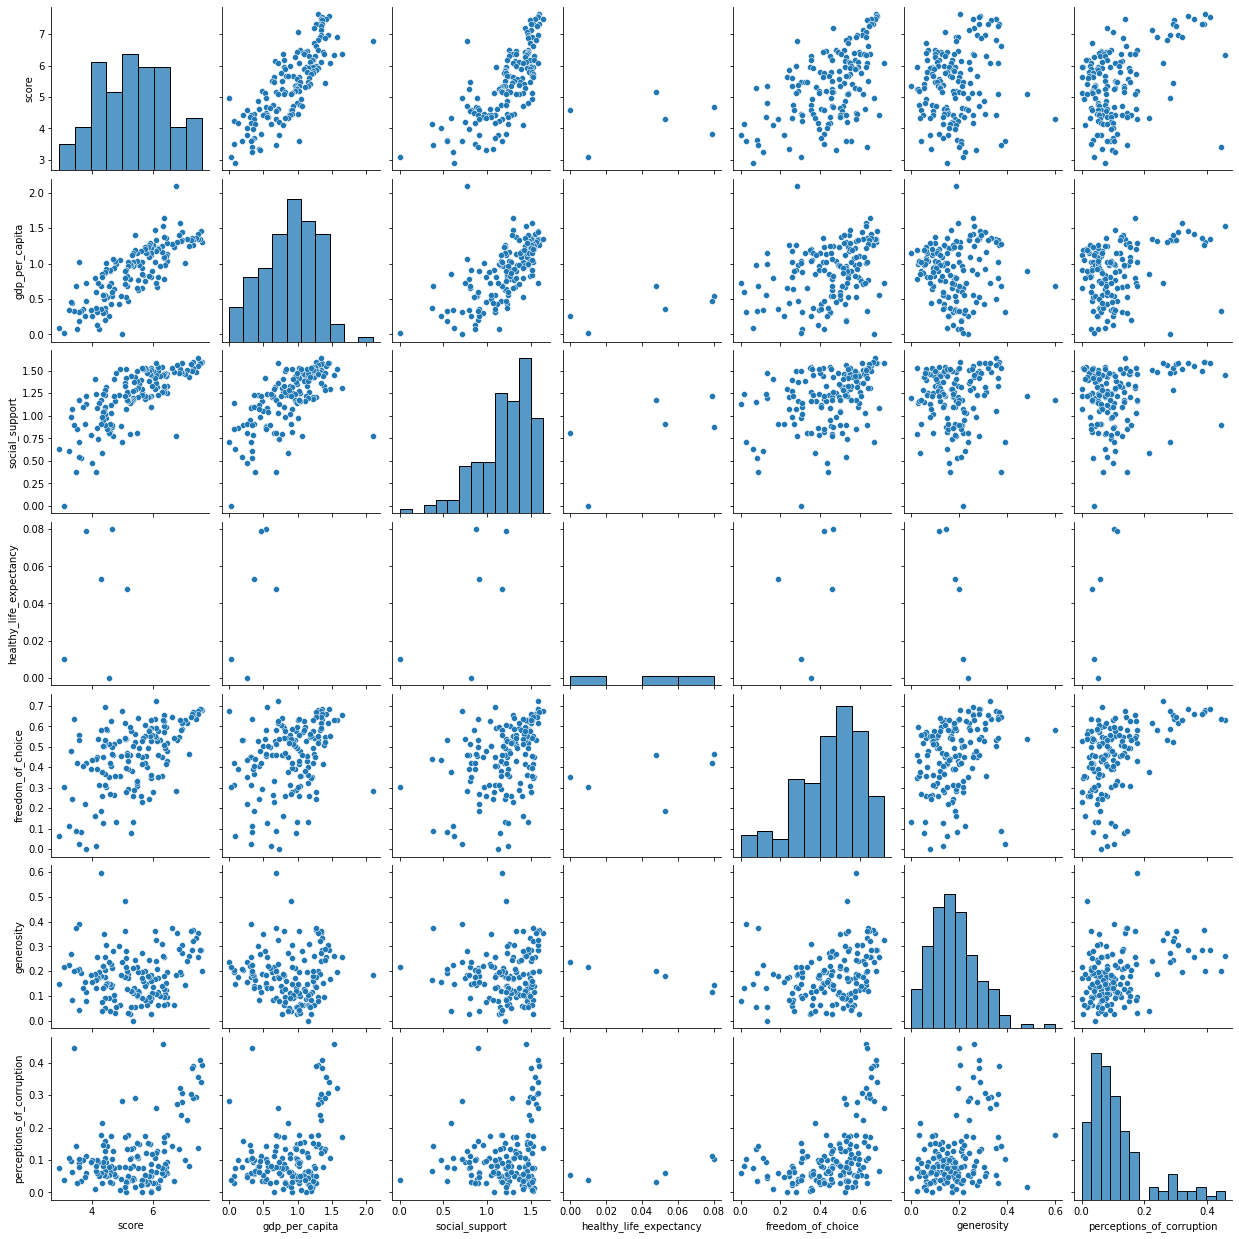

In [16]:
# Let's do a pairplot to see if we can see any trends in data in 2018
sns.pairplot(data_2018_copy)

plt.show()

In [ ]:
# Same for 2019
sns.pairplot(data_2019_copy)

plt.show()

There is a clear positive correlation between the score, the gdp_per_capita and the social_support.

In [ ]:
# Let's do a final check to see which columns have the higher correlation with the score. 
plt.figure(figsize=(8, 12))

heatmap = sns.heatmap(data_2018_copy.corr()[['score']].sort_values(by='score', ascending=False), 
                      vmin=-1, 
                      vmax=1, 
                      annot=True, 
                      cmap='BrBG')

heatmap.set_title('Features Correlating with the Score in 2018', fontdict={'fontsize':18}, pad=16);

In [ ]:
plt.figure(figsize=(8, 12))

heatmap = sns.heatmap(data_2019_copy.corr()[['score']].sort_values(by='score', ascending=False), 
                      vmin=-1, 
                      vmax=1, 
                      annot=True, 
                      cmap='BrBG')

heatmap.set_title('Features Correlating with the Score in 2019', fontdict={'fontsize':18}, pad=16);

We can confirm that the gdp_per_capita and the social_support have the highest correlation with the final score. 

## First hypothesis 
**1) The higher gdp_per_capita and social_support are, the more happy is a country**

First, we are going to check a bit our data.

In [ ]:
data_2018.head()

In [ ]:
data_2019.head()

In [ ]:
data_2018.gdp_per_capita.describe()

In [ ]:
data_2019.gdp_per_capita.describe()

In [ ]:
data_2018.social_support.describe()

In [ ]:
data_2019.social_support.describe()

**Outliers 2018 and 2019**

In [ ]:
# Check if there are any outliers

fig = plt.figure(figsize=(7,10))

ax1 = fig.add_subplot(2,1,1)
ax1.boxplot([data_2018['gdp_per_capita'], data_2018['social_support']], labels = ['gdp_per_capita', 'social_support'])
ax1.set_facecolor('white')
ax1.spines['left'].set_color('lightgray')
ax1.spines['right'].set_color('lightgray')
ax1.spines['top'].set_color('lightgray')
ax1.spines['bottom'].set_color('lightgray')
plt.title('2018')
plt.xticks([0], [''])


ax2 =fig.add_subplot(2,1,2)
ax2.boxplot([data_2019['gdp_per_capita'], data_2019['social_support']], labels = ['gdp_per_capita', 'social_support'])
ax2.set_facecolor('white')
ax2.spines['left'].set_color('lightgray')
ax2.spines['right'].set_color('lightgray')
ax2.spines['top'].set_color('lightgray')
ax2.spines['bottom'].set_color('lightgray')
plt.title('2019')

plt.suptitle('Data distribution for GDP per capita and social support')
plt.show()


We can see that in 2018 we have outliers in both columns and in 2019 only for the social_support.

In [ ]:
# Remove outliers: IQR
# for 2018

data_2018_wo_outliers = data_2018.copy()

Q1 = data_2018_wo_outliers["gdp_per_capita"].quantile(.25)
Q3 = data_2018_wo_outliers["gdp_per_capita"].quantile(.75)
IQR = Q3 - Q1
lower_limit = (Q1 - 1.5 * IQR)
upper_limit = (Q3 + 1.5 * IQR)

data_2018_wo_outliers = data_2018_wo_outliers[(data_2018_wo_outliers["gdp_per_capita"] > lower_limit) &
              (data_2018_wo_outliers["gdp_per_capita"] < upper_limit)]

In [ ]:
Q1 = data_2018_wo_outliers["social_support"].quantile(.25)
Q3 = data_2018_wo_outliers["social_support"].quantile(.75)
IQR = Q3 - Q1
lower_limit = (Q1 - 1.5 * IQR)
upper_limit = (Q3 + 1.5 * IQR)

#print(column,lower_limit, upper_limit)
data_2018_wo_outliers = data_2018_wo_outliers[(data_2018_wo_outliers["social_support"] > lower_limit) &
              (data_2018_wo_outliers["social_support"] < upper_limit)]

In [ ]:
data_2018_wo_outliers.shape

In [ ]:
# Remove outliers: IQR
# for 2019
data_2019_wo_outliers = data_2019.copy()

Q1 = data_2019_wo_outliers["social_support"].quantile(.25)
Q3 = data_2019_wo_outliers["social_support"].quantile(.75)
IQR = Q3 - Q1
lower_limit = (Q1 - 1.5 * IQR)
upper_limit = (Q3 + 1.5 * IQR)

#print(column,lower_limit, upper_limit)
data_2019_wo_outliers = data_2019_wo_outliers[(data_2019_wo_outliers["social_support"] > lower_limit) &
              (data_2019_wo_outliers["social_support"] < upper_limit)]

In [ ]:
data_2019_wo_outliers.shape

**Correlation gdp_per_capita and social_support**

In [ ]:
# Extract a subset of our clean dataframe for 2018 and 2019 only with data for gdp_per_capita and social_support
data_filtered_2018 = data_2018_wo_outliers[['gdp_per_capita','social_support']]
data_filtered_2019 = data_2019_wo_outliers[['gdp_per_capita','social_support']]

In [ ]:
# 2018
data_corr_2018 = data_filtered_2018.corr()
data_corr_2018

In [ ]:
# 2019
data_corr_2019 = data_filtered_2019.corr()
data_corr_2019

In [ ]:
# Plot both correlation matrices, one per year
fig = plt.figure(constrained_layout=True, figsize=(10,5))

ax_corr_2018 = fig.add_subplot(1,2,1)
ax_corr_2018 = sns.heatmap(data_corr_2018,
           xticklabels = data_corr_2018.columns.values,
           yticklabels = data_corr_2018.columns.values,
           annot = True, vmax=1, vmin=-1, center=0, cbar=False)
plt.title('2018')


ax_corr_2019 = fig.add_subplot(1,2,2)
ax_corr_2019 = sns.heatmap(data_corr_2019,
           xticklabels = data_corr_2019.columns.values,
           yticklabels = data_corr_2019.columns.values,
           annot = True, vmax=1, vmin=-1, center=0)
plt.title('2019')

plt.suptitle('Correlation between gdp_per_capita and social_support for each year')

plt.show()

We can confirm that in both years we have a strong correlation between these two parameters. So, we can now analyse if they influence the final score.

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(20,10))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

cm = plt.cm.get_cmap('RdYlBu')

sm1 = ax1.scatter(x=data_2018_wo_outliers['gdp_per_capita'], y=data_2018_wo_outliers['social_support'], c=data_2018_wo_outliers['score'], cmap=cm)
sm2 = ax2.scatter(x=data_2019_wo_outliers['gdp_per_capita'], y=data_2019_wo_outliers['social_support'], c=data_2019_wo_outliers['score'], cmap=cm)

ax1.set_facecolor('white')
ax1.spines['left'].set_color('lightgray')
ax1.spines['right'].set_color('lightgray')
ax1.spines['top'].set_color('lightgray')
ax1.spines['bottom'].set_color('lightgray')

ax2.set_facecolor('white')
ax2.spines['left'].set_color('lightgray')
ax2.spines['right'].set_color('lightgray')
ax2.spines['top'].set_color('lightgray')
ax2.spines['bottom'].set_color('lightgray')

fig.suptitle('GPD and social support correlation based on score', size = 20)
ax1.set_title('2018', size = 20)
ax2.set_title('2019', size = 20)
ax1.set(xlabel='GDP per Capita', ylabel='Social support')
ax2.set(xlabel='GDP per Capita', ylabel='Social support')

scales = np.linspace(0, 10)
norm = plt.Normalize(scales.min(), scales.max())
sm =  ScalarMappable(norm=norm, cmap=cm)
sm.set_array([])
plt.colorbar(sm)

plt.show()

## Second hypothesis 
**2) Is there a correlation between the GDP, social_support and freedom of choice? The more opportunities/help people get, the more they are free to pursue what they want to do.**

In [ ]:
# Check if there are any outliers

fig = plt.figure(figsize=(7,10))

ax3 = fig.add_subplot(2,1,1)
ax3.boxplot([data_2018['freedom_of_choice'], data_2018['social_support'], data_2018['gdp_per_capita']], labels = ['freedom_of_choice', 'social_support', 'gdp_per_capita'])
ax3.set_facecolor('white')
ax3.spines['left'].set_color('lightgray')
ax3.spines['right'].set_color('lightgray')
ax3.spines['top'].set_color('lightgray')
ax3.spines['bottom'].set_color('lightgray')
plt.title('2018')
plt.xticks([0], [''])


ax4 =fig.add_subplot(2,1,2)
ax4.boxplot([data_2019['freedom_of_choice'], data_2019['social_support'], data_2019['gdp_per_capita']], labels = ['freedom_of_choice', 'social_support', 'gdp_per_capita'])
ax4.set_facecolor('white')
ax4.spines['left'].set_color('lightgray')
ax4.spines['right'].set_color('lightgray')
ax4.spines['top'].set_color('lightgray')
ax4.spines['bottom'].set_color('lightgray')
plt.title('2019')

plt.suptitle('Data distribution for Freedom of choice and Social support and GDP')
plt.show()


In [ ]:
# Remove outliers: IQR
# for 2018

data_2018_wo_outliers_freedom_of_choice = data_2018.copy()

Q1 = data_2018_wo_outliers_freedom_of_choice["freedom_of_choice"].quantile(.25)
Q3 = data_2018_wo_outliers_freedom_of_choice["freedom_of_choice"].quantile(.75)
IQR = Q3 - Q1
lower_limit = (Q1 - 1.5 * IQR)
upper_limit = (Q3 + 1.5 * IQR)

data_2018_wo_outliers_freedom_of_choice = data_2018_wo_outliers_freedom_of_choice[(data_2018_wo_outliers_freedom_of_choice["freedom_of_choice"] > lower_limit) &
              (data_2018_wo_outliers_freedom_of_choice["freedom_of_choice"] < upper_limit)]

In [ ]:
Q1 = data_2018_wo_outliers_freedom_of_choice["social_support"].quantile(.25)
Q3 = data_2018_wo_outliers_freedom_of_choice["social_support"].quantile(.75)
IQR = Q3 - Q1
lower_limit = (Q1 - 1.5 * IQR)
upper_limit = (Q3 + 1.5 * IQR)

#print(column,lower_limit, upper_limit)
data_2018_wo_outliers_freedom_of_choice = data_2018_wo_outliers_freedom_of_choice[(data_2018_wo_outliers_freedom_of_choice["social_support"] > lower_limit) &
              (data_2018_wo_outliers_freedom_of_choice["social_support"] < upper_limit)]

In [ ]:
Q1 = data_2018_wo_outliers_freedom_of_choice["gdp_per_capita"].quantile(.25)
Q3 = data_2018_wo_outliers_freedom_of_choice["gdp_per_capita"].quantile(.75)
IQR = Q3 - Q1
lower_limit = (Q1 - 1.5 * IQR)
upper_limit = (Q3 + 1.5 * IQR)

#print(column,lower_limit, upper_limit)
data_2018_wo_outliers_freedom_of_choice = data_2018_wo_outliers_freedom_of_choice[(data_2018_wo_outliers_freedom_of_choice["gdp_per_capita"] > lower_limit) &
              (data_2018_wo_outliers_freedom_of_choice["gdp_per_capita"] < upper_limit)]

In [ ]:
data_2018_wo_outliers_freedom_of_choice.shape

In [ ]:
# Remove outliers: IQR
# for 2019
data_2019_wo_outliers_freedom_of_choice = data_2019.copy()

Q1 = data_2019_wo_outliers_freedom_of_choice["freedom_of_choice"].quantile(.25)
Q3 = data_2019_wo_outliers_freedom_of_choice["freedom_of_choice"].quantile(.75)
IQR = Q3 - Q1
lower_limit = (Q1 - 1.5 * IQR)
upper_limit = (Q3 + 1.5 * IQR)

#print(column,lower_limit, upper_limit)
data_2019_wo_outliers_freedom_of_choice = data_2019_wo_outliers_freedom_of_choice[(data_2019_wo_outliers_freedom_of_choice["freedom_of_choice"] > lower_limit) &
              (data_2019_wo_outliers_freedom_of_choice["freedom_of_choice"] < upper_limit)]

In [ ]:
Q1 = data_2019_wo_outliers_freedom_of_choice["social_support"].quantile(.25)
Q3 = data_2019_wo_outliers_freedom_of_choice["social_support"].quantile(.75)
IQR = Q3 - Q1
lower_limit = (Q1 - 1.5 * IQR)
upper_limit = (Q3 + 1.5 * IQR)

#print(column,lower_limit, upper_limit)
data_2019_wo_outliers_freedom_of_choice = data_2019_wo_outliers_freedom_of_choice[(data_2019_wo_outliers_freedom_of_choice["social_support"] > lower_limit) &
              (data_2019_wo_outliers_freedom_of_choice["social_support"] < upper_limit)]

In [ ]:
data_2019_wo_outliers_freedom_of_choice.shape

**Correlation gdp_per_capita and freedom_of_choice**

In [ ]:
# Extract a subset of our clean dataframe for 2018 and 2019 only with data for gdp_per_capita, social_support and freedom_of_choice
data_filtered_2018_freedom_of_choice = data_2018_wo_outliers_freedom_of_choice[['freedom_of_choice','social_support', "gdp_per_capita"]]
data_filtered_2019_freedom_of_choice = data_2019_wo_outliers_freedom_of_choice[['freedom_of_choice','social_support', "gdp_per_capita"]]

In [ ]:
# 2018
data_corr_2018_freedom_of_choice = data_filtered_2018_freedom_of_choice.corr()
data_corr_2018_freedom_of_choice

In [ ]:
# 2019
data_corr_2019_freedom_of_choice = data_filtered_2019_freedom_of_choice.corr()
data_corr_2019_freedom_of_choice

In [ ]:
# Plot both correlation matrices, one per year
fig = plt.figure(constrained_layout=True, figsize=(10,5))

ax_corr_2018_freedom_of_choice = fig.add_subplot(1,2,1)
ax_corr_2018_freedom_of_choice = sns.heatmap(data_corr_2018_freedom_of_choice,
           xticklabels = data_corr_2018_freedom_of_choice.columns.values,
           yticklabels = data_corr_2018_freedom_of_choice.columns.values,
           annot = True, vmax=1, vmin=-1, center=0, cbar=False)
plt.title('2018')


ax_corr_2019_freedom_of_choice = fig.add_subplot(1,2,2)
ax_corr_2019_freedom_of_choice = sns.heatmap(data_corr_2019_freedom_of_choice,
           xticklabels = data_corr_2019_freedom_of_choice.columns.values,
           yticklabels = data_corr_2019_freedom_of_choice.columns.values,
           annot = True, vmax=1, vmin=-1, center=0)
plt.title('2019')

plt.suptitle('Correlation between Freedom of choice and Social support for each year')

plt.show()

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(25,15))
plt.rcParams["font.size"] = "12"

ax5 = fig.add_subplot(121, projection='3d')
ax6 = fig.add_subplot(122, projection='3d')

cm = plt.cm.get_cmap('RdYlBu')

sm5 = ax5.scatter3D(xs=data_2018_wo_outliers_freedom_of_choice['freedom_of_choice'], ys=data_2018_wo_outliers_freedom_of_choice['social_support'], zs=data_2018_wo_outliers_freedom_of_choice['gdp_per_capita'], c=data_2018_wo_outliers_freedom_of_choice['score'], s=500, cmap=cm)
sm6 = ax6.scatter3D(xs=data_2019_wo_outliers_freedom_of_choice['freedom_of_choice'], ys=data_2019_wo_outliers_freedom_of_choice['social_support'], zs=data_2019_wo_outliers_freedom_of_choice['gdp_per_capita'], c=data_2019_wo_outliers_freedom_of_choice['score'], s=500, cmap=cm,)

ax5.set_facecolor('white')
ax5.spines['left'].set_color('lightgray')
ax5.spines['right'].set_color('lightgray')
ax5.spines['top'].set_color('lightgray')
ax5.spines['bottom'].set_color('lightgray')

ax6.set_facecolor('white')
ax6.spines['left'].set_color('lightgray')
ax6.spines['right'].set_color('lightgray')
ax6.spines['top'].set_color('lightgray')
ax6.spines['bottom'].set_color('lightgray')

fig.suptitle('Freedom of choice and Social support correlation based on score', size = 20)
ax5.set_title('2018', size = 20)
ax6.set_title('2019', size = 20)
ax5.set(xlabel='Freedom of choice', ylabel='Social support', zlabel = 'GDP per capita')
ax6.set(xlabel='Freedom of choice', ylabel='Social support', zlabel = 'GDP per capita')

scales = np.linspace(0, 10)
norm = plt.Normalize(scales.min(), scales.max())
sm =  ScalarMappable(norm=norm, cmap=cm)
sm.set_array([])
plt.colorbar(sm)

plt.show()

In [ ]:
print("gdp_per_capita and social_support scores in the UK in 2018 and 2019: \t")

Mean_Data = {'Year': [2018, 2019], "gdp_per_capita" : [1.244, 1.333], 
             "Mean gdp_per_capita of Top 15" : [1.327, 1.366], 'Year': [2018, 2019], 
             "social_support" : [1.433, 1.538], "Mean social_support of Top 15" : [1.540, 1.526]}
df = pd.DataFrame(Mean_Data).explode('Year')
display(df)

## Story Telling : How to make a happy country? 
## Case Study : Making Brits happier!
**How to be in the top 10**

When the GDP and social support have similar scores, what determines the final score are the freedom of choice and perception of corruption. That is why the UK when from 11th to 15th between 2018 and 2019.

In [ ]:
data[data["country"] == "United Kingdom"]

In [ ]:
data_top15_2018 = data_2018.head(15)

In [ ]:
data_top15_2019 = data_2019.head(15)

In [ ]:
df1 = data_top15_2018.reset_index(drop=True)

In [ ]:
df2 = data_top15_2019.reset_index(drop=True)

In [ ]:
df1.compare(df2, align_axis=0, keep_equal = True).rename(index={'self': '2018', 'other': '2019'}, level=-1)

In [ ]:
print("Freedom of Choice and Perception of Corruption scores in the UK in 2018 and 2019: \t")

Mean_Data = {'Year': [2018, 2019], "Freedom_of_choice" : [0.464, 0.450], "Mean Freedom of Choice of Top 15" : [0.637, 0.549], 'Year': [2018, 2019], "Perceptions_of_corruption" : [0.082, 0.278], "Mean Perception of Corruption of Top 15" : [0.285, 0.283]}
df = pd.DataFrame(Mean_Data).explode('Year')
display(df)

In both 2018 and 2019 the UK's scores for Freedom of Choice and Perception of Corruption are below the average of the Top 15 countries.

In [ ]:
top15 = data_top15_2018[['country', 'freedom_of_choice', 'perceptions_of_corruption']].merge(data_top15_2019[['country', 
                                                                                                              'freedom_of_choice', 'perceptions_of_corruption']], 
                                                                                             on='country', how="inner", suffixes=('_2018', '_2019'))

In [ ]:
y = [0.5]
x = [10]
n = [11]

y1 = [0.4]
x1 = [10]
n1 = [15]


In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# Variables that define subsets of the data, which will be drawn on separate facets in the grid.
sns.lineplot(x=top15.index,y=top15['freedom_of_choice_2018'],data=top15,marker='o',
             markersize=10,lw=4,label = '2018',color='#4848FF',ax=ax)

sns.lineplot(x=top15.index,y=top15['freedom_of_choice_2019'],data=top15,marker='s',
             markersize=10,lw=4,label = '2019',color='#FF6800',ax=ax)
plt.title('Freedom of choice by country',fontsize=14,ha='right')

# Put a legend below current axis
plt.legend(loc='lower right')
plt.ylabel('')
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.annotate("Between 2018 and 2019 the top 15 countries had their freedom of choice decreased.\n\
However, the United Kingdom score remained the same but it's still below the mean.",
             xy=(10,0.8),xytext=(10,0.8),color='#616161',fontsize=18)
sns.despine();
ax.set(xticks=range(0, 13), xticklabels=top15.country.tolist());


for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]),fontsize=16)
    

for i, txt in enumerate(n1):
    ax.annotate(txt, (x1[i], y1[i]),fontsize=16)
    




In [ ]:
y2 = [0.3]
x2 = [10]
n2 = [15]

y3 = [0.05]
x3 = [10]
n3 = [11]

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# Variables that define subsets of the data, which will be drawn on separate facets in the grid.
sns.lineplot(x=top15.index,y=top15['perceptions_of_corruption_2018'],data=top15,marker='o',
             markersize=10,lw=4,label = '2018',color='#4848FF',ax=ax)

sns.lineplot(x=top15.index,y=top15['perceptions_of_corruption_2019'],data=top15,marker='s',
             markersize=10,lw=4,label = '2019',color='#FF6800',ax=ax)
plt.title('Perceptions of corruption by country',fontsize=18,ha='right')

# Put a legend below current axis
plt.legend(loc='center right')
plt.ylabel('')
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.annotate("Between 2018 and 2019 the top 15 countries maintained the level of perception of corruption scores.\n\
However in the United Kingdom those scores increased by almost two points",
             xy=(10,0.8),xytext=(10,0.8),color='#616161',fontsize=20)
sns.despine();
ax.set(xticks=range(0, 13), xticklabels=top15.country.tolist());


for i, txt in enumerate(n2):
    ax.annotate(txt, (x2[i], y2[i]),fontsize=16)
    

for i, txt in enumerate(n3):
    ax.annotate(txt, (x3[i], y3[i]),fontsize=16)

## Conclusion: Case study 

### UK positive points

Looking at the Happiness Score report, The United Kingdom has presented some 
improvements regarding **GDP per capita** and **Social Support** between 2018 and 2019.  As we show in our EDA section these are two impactful factors that affect the population. In both years the values were very close or above the mean of the top 15 countries.
However, the performance of the country have been going down. 
The reason is that the perception of corruption and the freedom of choice levels have decreased.



### UK improvement suggestions

**Freedom of choice** definition:  
<em>"The right or ability to choose whatever you want to do or have"</em>    


Freedom of choice is about opportunities given to individuals, it can go from the diversity of products one has access to when he goes to the supermarket to services provided to individuals in the society, such has education or healthcare. If we take the examples of education and healthcare, public or private, it is essential that an easy access and a certain quality should be provided to guarantee the same chances whatever the person’s social or financial background.   

Examples:
- Health treatment full coverage
- differences between private and public school systems
- Brexit consequences, like travel restrictions or rights in other countries


In this regard, we suggest to the government to provide some reassurance and clarity about their rights after the withdrawal of the European Union.

**Perceptions of corruption** definition:

<em>"Corruption and corruption perception can be considered as cultural phenomena because they depend on how a society understands the rules and what constitutes a deviation. High levels of corruption perception could have more devastating effects than corruption itself"</em>  

The increase between 2018 and 2019 in the UK indicates the population has lost trust in the government and public sector transparency. The recent events like the Brexit might have influenced how the people see the politics and bussinesses. And economics inestability and income-inequality have a negative effect on perceptions of corruption, while a better economic performance reduces corruption perception.  

In this regard, transparency is key to improve those levels. A better regulation to avoid fraud and black markets could and improve with a more open and clearer communication with the citizens. Through public debates and participative political actions leading to political stability, the gap between the average citizen and the political class could narrow. 